In [1]:
from datetime import datetime

from finance_utils.backtest import Backtest
import yfinance as yf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from_beginning = '1987-01-01'
# hang seng index start: 1987-01-01
name = 'SPY'

[*********************100%%**********************]  1 of 1 completed


---- Running the backtest... ----
---- Backtesting completed ----

Annualised Return (Geo): 0.10302549746559819
Avg Annual Return (Ari): 0.11208924175174888
Volatility (Std): 0.18668817738022175
Sharpe Ratio: 0.5518587138797199
Downside Volatility: 0.13150514545097286
Sortino Ratio: 0.7834332041707652
VaR 99: -0.03235884240257486
VaR 99 (Year): -0.36236759818725667
CVaR 99: -0.04676948852090401
CVaR 99 (Year): -0.36236759818725667
Initial Value: 24.68410873413086
Peak Value: 564.8599853515625
Final Value: 542.0399780273438
Max Drawdown: 0.5518943576578772
Avg Drawdown: 0.10496212950519611
Calmar Ratio: 0.18667612023217015
Sterling Ratio: 0.9815492306727442
Monthly Stats: 
      count      mean       std       min       25%       50%       75%  \
Date                                                                      
1      32.0  0.002948  0.042805 -0.108972 -0.026712  0.008927  0.028992   
2      32.0 -0.004406  0.041668 -0.104747 -0.025673  0.000991  0.021804   
3      32.0  0.0107

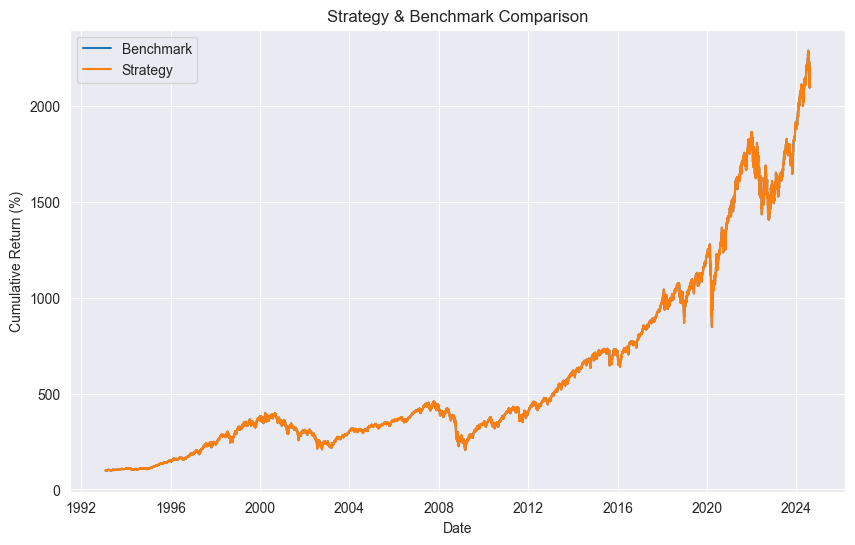

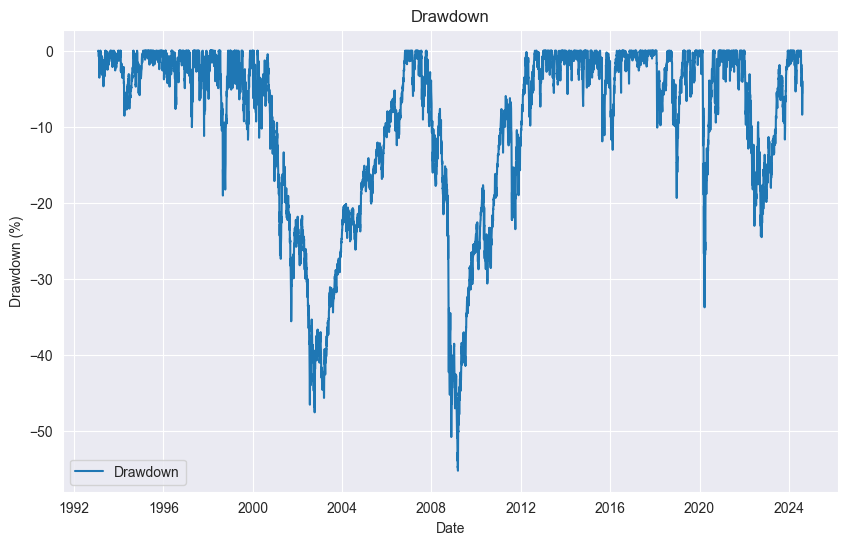

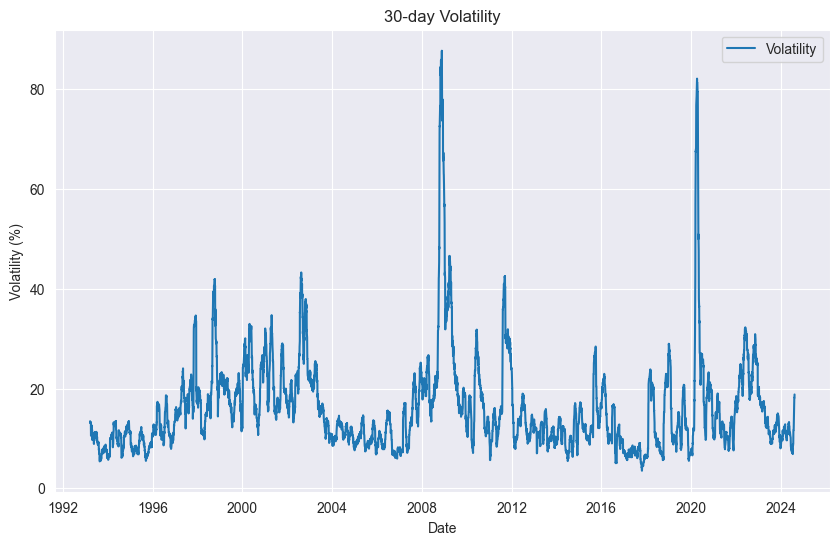

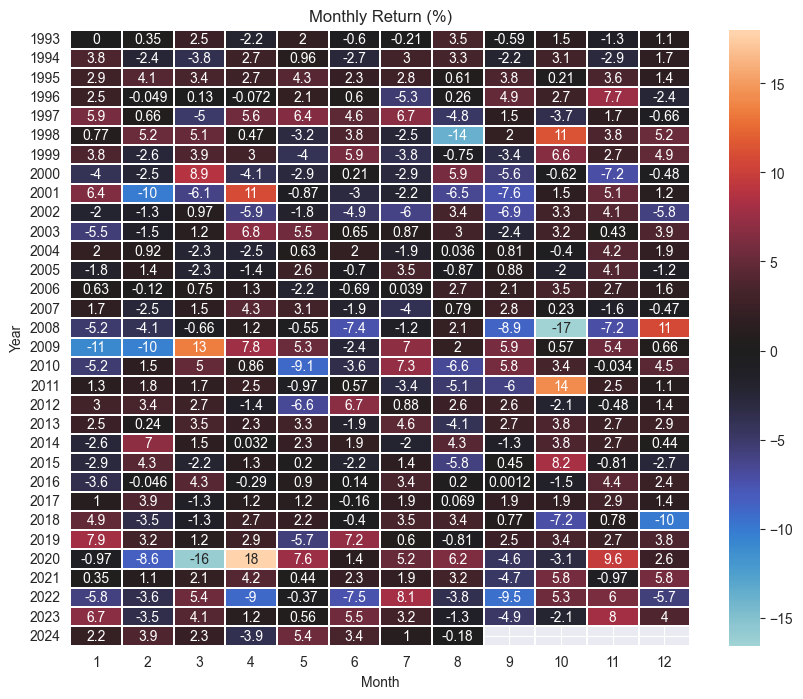

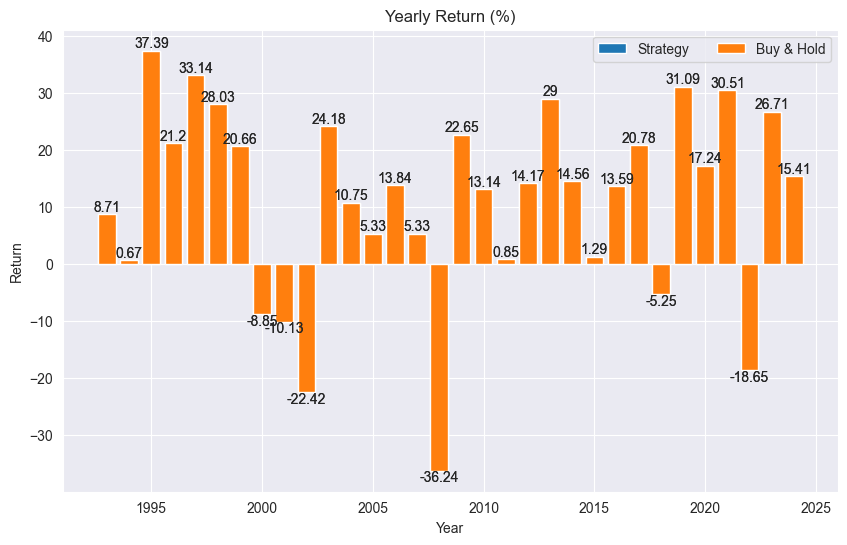

In [3]:
start_date = from_beginning
df = yf.download(name, start=start_date)

df1 = pd.DataFrame()
df1['Price'] = df['Adj Close']
df1['Value'] = df['Adj Close']
df1['Return'] = df['Adj Close'].pct_change()

test_df = Backtest(df1)

In [4]:
df_monthly = test_df.results['Monthly Return']
# set time here
today = datetime.now()
last_10_years = f'{today.year - 9}-01-01'
last_20_years = f'{today.year - 19}-01-01'
last_30_years = f'{today.year - 29}-01-01'
start_date = f'1900-01-01'
choices = [last_10_years, last_20_years, last_30_years, start_date]

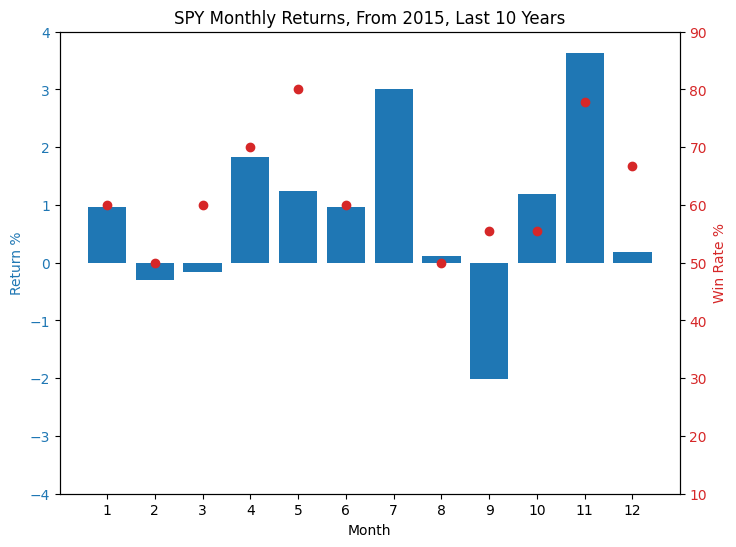

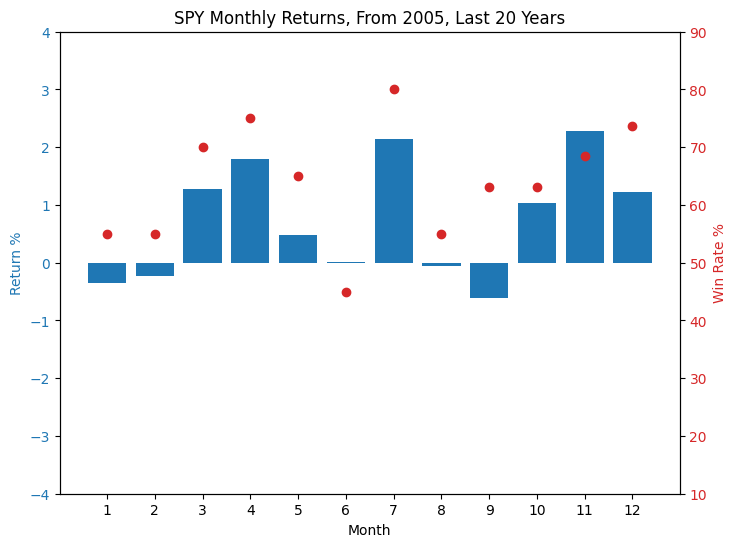

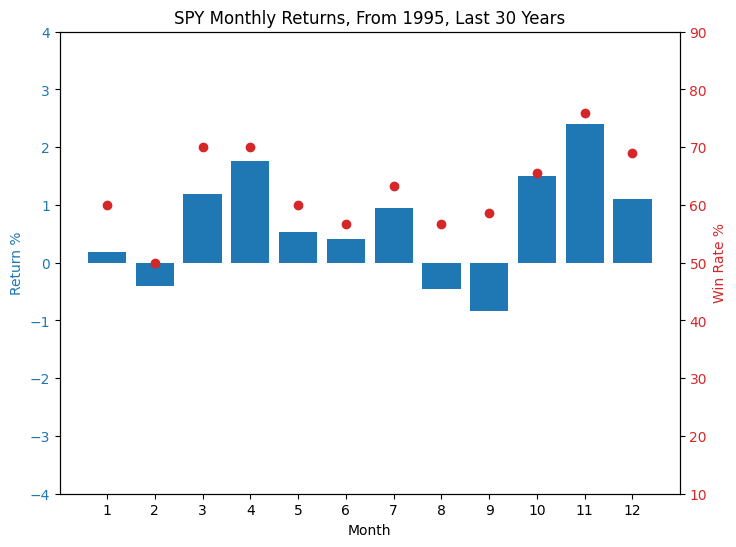

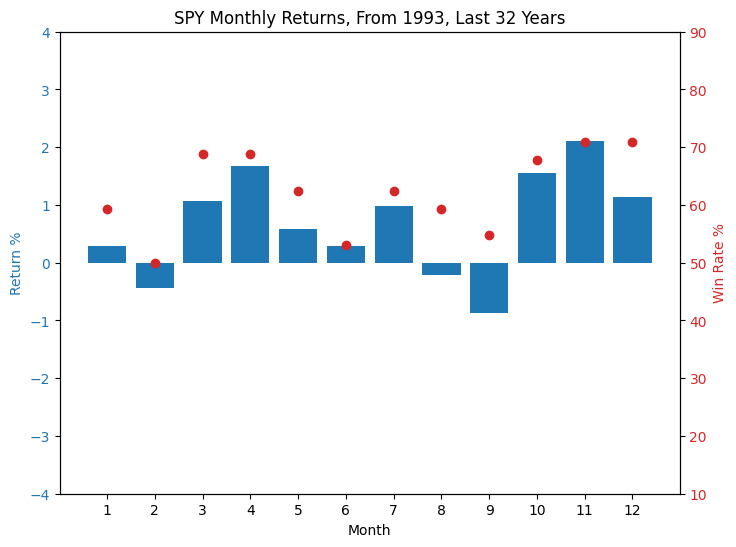

In [9]:
for time in choices:
    _new_df = df_monthly[df_monthly.index >= time]
    
    avg_returns = _new_df.groupby(_new_df.index.month).mean() * 100
    avg_returns.name = 'Return %'
    avg_returns.index.name = 'Month'
    
    wins = _new_df.groupby(_new_df.index.month).apply(lambda x: (x > 0).sum())
    alls = _new_df.groupby(_new_df.index.month).count()
    win_rates = wins / alls * 100
    win_rates.name = 'Win Rate %'
    win_rates.index.name = 'Month'
    
    fig, ax1 = plt.subplots(figsize=(8, 6))
    plt.grid(False)
    color = 'tab:blue'
    ax1.set_xlabel('Month')
    ax1.set_ylabel('Return %', color=color)
    ax1.bar(x=avg_returns.index, height=avg_returns, color=color)
    ax1.tick_params(axis='y', labelcolor=color)
    ax1.set_ylim(-4, 4)
    
    ax2 = ax1.twinx()  # instantiate a second Axes that shares the same x-axis
    plt.grid(False)
    color = 'tab:red'
    ax2.set_ylabel('Win Rate %', color=color)  # we already handled the x-label with ax1
    ax2.scatter(x=win_rates.index, y=win_rates, color=color)
    ax2.tick_params(axis='y', labelcolor=color)
    ax2.set_ylim(10, 90)
    
    plt.xticks(range(1, 13))
    years = 1 + _new_df.index.year[-1] - _new_df.index.year[0]
    plt.title(f'{name} Monthly Returns, From {_new_df.index[0].year}, Last {years} Years')
    # plt.savefig(f'hsi_monthly_returns_last_{years}_years.png')
    plt.show()

Conclusion (For Hang Seng Index Only):
- 4 best months rank by mean / std are month: 4, 12, 7, 2
- October is the month with the highest standard deviation (volatility)
- Month 8, 3, 9, 6, 5 have avg negative returns
- Month 3, 8 are the worst

In [10]:
monthly_df = pd.DataFrame(test_df.results['Monthly Return'].copy())
monthly_stats = monthly_df.groupby(monthly_df.index.month).describe()['Monthly Return']
monthly_stats.index.name = 'Month'
monthly_stats = monthly_stats * 100
monthly_stats['count'] /= 100
monthly_stats['mean / std'] = monthly_stats['mean'] / monthly_stats['std']
monthly_stats

,count,mean,std,min,25%,50%,75%,max,mean / std
Month,,,,,,,,,
1,32.0,0.294772,4.280531,-10.897172,-2.671208,0.892723,2.899184,7.894302,0.068863
2,32.0,-0.440588,4.166814,-10.474678,-2.567277,0.099095,2.180443,6.958717,-0.105737
3,32.0,1.074054,4.975908,-16.119687,-1.269378,1.502421,3.556420,13.440709,0.215851
4,32.0,1.668514,4.924738,-9.034704,-0.561075,1.276520,2.904016,18.009341,0.338803
5,32.0,0.587344,3.800424,-9.123389,-1.175574,0.766096,2.766468,7.613423,0.154547
6,32.0,0.288190,3.644215,-7.497840,-2.018694,0.178136,2.301593,7.231349,0.079082
7,32.0,0.978232,3.768317,-6.049748,-2.059675,0.941038,3.443237,8.065794,0.259594
8,32.0,-0.215271,4.295604,-13.756332,-1.955995,0.233343,3.028869,6.241053,-0.050114
9,31.0,-0.876223,4.326741,-9.528469,-4.676844,0.446491,2.318002,5.881157,-0.202513


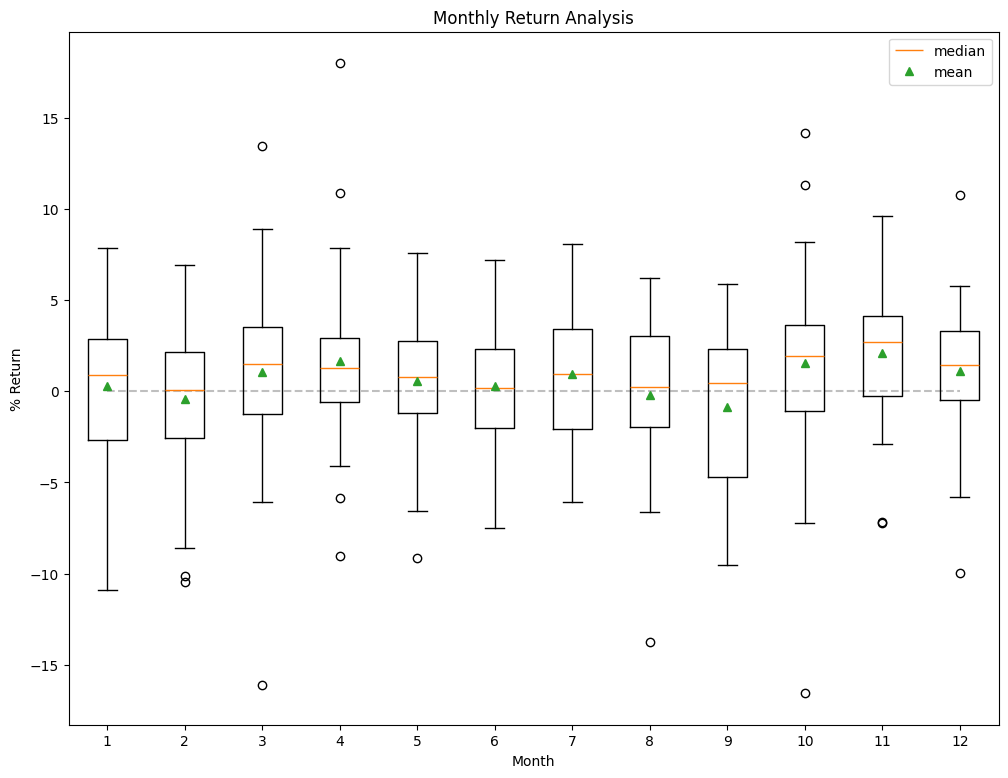

In [11]:
dfs = [_df for _df in monthly_df['Monthly Return'].groupby(monthly_df.index.month)]
array_of_df = []

vals, names, xs = [],[],[]

for _df in dfs:
    new_df: pd.Series = _df[1] * 100
    new_df.name = str(_df[0])
    vals.append(new_df.values.tolist())
    names.append(new_df.name)
    xs.append([int(new_df.name) for i in range(len(new_df.index))])

all_mean = monthly_df['Monthly Return'].mean()

fig, ax = plt.subplots(figsize=(12, 9))
plt.plot([i + 1 for i in range(12)], [all_mean for i in range(12)], alpha=0.5
         , linestyle='--', color='grey', label='overall mean return')
bp = plt.boxplot(vals, showmeans=True, tick_labels=names)

plt.style.use('default')
plt.title('Monthly Return Analysis')
plt.xlabel('Month')
plt.ylabel('% Return')
plt.legend([bp['medians'][0], bp['means'][0]], ['median', 'mean'])
plt.grid(False)
plt.show()